In [114]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import os
import re

In [115]:
files = os.listdir('C:/Users/parky/Desktop/과제 및 자료들/source code/Final Project/RE100/')

In [116]:
H = 1
dx = H/128  # grid spacing  
nx = int(H / dx)+1  # number of grid points in x-direction

In [117]:
# 'u'로 시작하는 파일들만 필터링
u_files = [f for f in files if f.startswith('u')]
v_files = [f for f in files if f.startswith('v')]

u_name, v_name = u_files[-1], v_files[-1]

In [118]:
u_field_mean = np.load(f'C:/Users/parky/Desktop/과제 및 자료들/source code/Final Project/RE100/{u_name}')
v_field_mean = np.load(f'C:/Users/parky/Desktop/과제 및 자료들/source code/Final Project/RE100/{v_name}')

In [119]:
u_field_mean

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.44725584e-05,  5.26083052e-05, ...,
         2.54826496e-05,  7.25788146e-06,  0.00000000e+00],
       [ 0.00000000e+00,  4.28664355e-05,  7.06250947e-05, ...,
         4.74808626e-05,  1.60394173e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -2.13977710e-02,  2.78518270e-02, ...,
         8.26907347e-02, -3.11551360e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.25951278e-01,  2.70856693e-01, ...,
         3.25446153e-01,  1.54753929e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],
      shape=(129, 129))

In [120]:
v_field_mean

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.42264839e-05,  1.02661434e-05, ...,
         5.23229281e-06, -2.54732234e-06,  0.00000000e+00],
       [ 0.00000000e+00, -6.61179281e-06, -1.29799692e-05, ...,
         3.53090214e-05,  1.58575264e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  2.70841972e-01,  2.68108012e-01, ...,
        -3.09113421e-01, -3.25443022e-01,  0.00000000e+00],
       [ 0.00000000e+00,  2.26249158e-01,  1.69185518e-01, ...,
        -1.76515584e-01, -2.48909891e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
      shape=(129, 129))

In [121]:
u_field_mean

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.44725584e-05,  5.26083052e-05, ...,
         2.54826496e-05,  7.25788146e-06,  0.00000000e+00],
       [ 0.00000000e+00,  4.28664355e-05,  7.06250947e-05, ...,
         4.74808626e-05,  1.60394173e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -2.13977710e-02,  2.78518270e-02, ...,
         8.26907347e-02, -3.11551360e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.25951278e-01,  2.70856693e-01, ...,
         3.25446153e-01,  1.54753929e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],
      shape=(129, 129))

Text(0.5, 1.0, 'Lid-driven Cavitiy Velocity Field at Reynodls 100. Time[s] = 8.47')

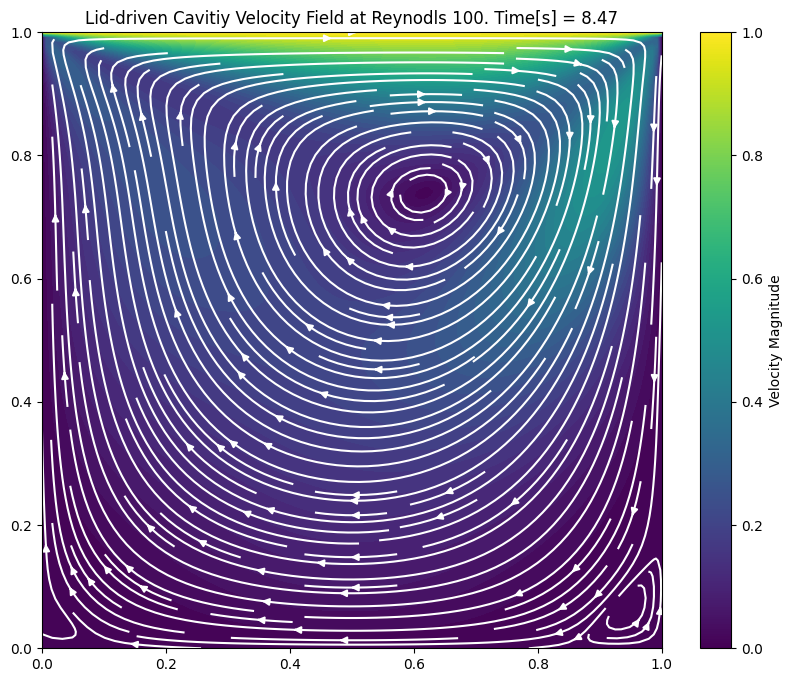

In [122]:
u = np.sqrt(u_field_mean**2 + v_field_mean**2)
X, Y = np.meshgrid(np.linspace(0, H, nx), np.linspace(0, H, nx))
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, u, levels=50, cmap='viridis')
plt.streamplot(X, Y, u_field_mean, v_field_mean, color='white',density=2)
plt.colorbar(label='Velocity Magnitude')
plt.xlim(0, H)
plt.ylim(0, H)
plt.title(f'Lid-driven Cavitiy Velocity Field at Reynodls 100. Time[s] = {float(u_name[1:-4]):.2f}')

In [123]:
u_field_mean.shape

(129, 129)

In [124]:
u_field_mean

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.44725584e-05,  5.26083052e-05, ...,
         2.54826496e-05,  7.25788146e-06,  0.00000000e+00],
       [ 0.00000000e+00,  4.28664355e-05,  7.06250947e-05, ...,
         4.74808626e-05,  1.60394173e-05,  0.00000000e+00],
       ...,
       [ 0.00000000e+00, -2.13977710e-02,  2.78518270e-02, ...,
         8.26907347e-02, -3.11551360e-03,  0.00000000e+00],
       [ 0.00000000e+00,  1.25951278e-01,  2.70856693e-01, ...,
         3.25446153e-01,  1.54753929e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00]],
      shape=(129, 129))